**Theoretical**

ques 1  Can we use Bagging for regression problems?

Yes, Bagging (Bootstrap Aggregating) can absolutely be used for regression problems and it often performs quite well.

ques 2  What is the difference between multiple model training and single model training ?

The main difference between multiple model training and single model training lies in the number of models used and how predictions are made

ques 3 Explain the concept of feature randomness in Random Forest .

Feature randomness is a key concept that sets Random Forest apart from standard Bagging and makes it a powerful ensemble learning method.

ques 4 What is OOB (Out-of-Bag) Score ?

The OOB (Out-of-Bag) Score is a useful concept in ensemble methods like Random Forest that use bootstrap sampling. It provides a way to evaluate model performance without using a separate validation set or cross-validation.

ques 5  How can you measure the importance of features in a Random Forest model ?

You can measure feature importance in a Random Forest model by analyzing how much each feature contributes to reducing impurity (like Gini impurity or variance) across all trees. This helps you understand which features have the most predictive power in the model.

ques 6 Explain the working principle of a Bagging Classifier .

The Bagging Classifier (short for Bootstrap Aggregating Classifier) is an ensemble learning method designed to reduce variance and improve the stability and accuracy of machine learning models, particularly high-variance, low-bias models like decision trees.

ques 7 How do you evaluate a Bagging Classifier’s performance?

Evaluating the performance of a Bagging Classifier involves using standard classification evaluation techniques.

ques 8 How does a Bagging Regressor work ?

A Bagging Regressor is the regression counterpart of a Bagging Classifier. It combines predictions from multiple regression models (typically high-variance models like decision trees) to improve overall prediction accuracy and robustness.

ques 9  What is the main advantage of ensemble techniques ?


The main advantage of ensemble techniques is that they combine the strengths of multiple models to produce more accurate, stable, and robust predictions than any single model alone.


ques 10  What is the main challenge of ensemble methods ?

The main challenge of ensemble methods is increased complexity, which leads to higher computational cost and reduced interpretability compared to single models.

ques 11  Explain the key idea behind ensemble techniques .

The key idea behind ensemble techniques is to combine multiple individual models to create a stronger overall model that performs better than any single model alone. By aggregating diverse models, ensembles reduce errors, improve accuracy, and increase robustness.

ques 12  What is a Random Forest Classifier ?

A Random Forest Classifier is an ensemble learning method used for classification tasks. It builds multiple decision trees during training and combines their predictions to improve accuracy, reduce overfitting, and increase robustness.

ques 13  What are the main types of ensemble techniques ?

The main types of ensemble techniques are:

* Bagging (Bootstrap Aggregating)

Trains multiple models independently on different random samples of the data (with replacement).

Predictions are combined by averaging (regression) or majority voting (classification).

Example: Random Forest.

* Boosting

Trains models sequentially, where each new model focuses on correcting the errors of the previous ones.

Combines models by weighted voting or additive prediction.

Examples: AdaBoost, Gradient Boosting, XGBoost, LightGBM.

* Stacking (Stacked Generalization)

Combines multiple different models (could be diverse algorithms) by training a meta-model on their outputs.

ques 14 What is ensemble learning in machine learning ?

Ensemble learning in machine learning is a technique where multiple models (called base learners) are trained and combined to solve a problem, with the goal of improving overall performance compared to any single model

ques 15  When should we avoid using ensemble methods?

You should avoid using ensemble methods when:

* Interpretability is critical: Ensembles are often “black boxes” and hard to explain.

* Computational resources are limited: Training and predicting with many models can be slow and resource-heavy.

* You have a small dataset: Ensembles may overfit or not add much benefit with limited data.

ques 16  How does Bagging help in reducing overfitting ?

Bagging reduces overfitting by training multiple models on different random subsets of the data and then averaging their predictions, which smooths out individual model errors and lowers variance.

Ques 17  Why is Random Forest better than a single Decision Tree ?

Random Forest is better than a single Decision Tree because it reduces overfitting and improves generalization by combining many trees trained on different random subsets of data and features. This ensemble approach lowers variance and makes the model more robust and accurate than a single tree, which can easily overfit the training data.

ques 18 What is the role of bootstrap sampling in Bagging ?

The role of bootstrap sampling in Bagging is to create multiple different training datasets by randomly sampling with replacement from the original data. This generates diverse subsets for training each base model, which helps:

* Introduce variation among models (they see slightly different data),

* Reduce correlation between base models,

* Improve the ensemble’s overall robustness and accuracy by averaging diverse predictions

ques 19 What are some real-world applications of ensemble techniques ?

some common real-world applications of ensemble techniques:

* Finance: Fraud detection, credit scoring, and stock market prediction.

* Healthcare: Disease diagnosis, patient outcome prediction, medical image analysis.

* Marketing: Customer segmentation, churn prediction, personalized recommendations.

ques 20  What is the difference between Bagging and Boosting?

Bagging builds many independent models and combines them to reduce variance.

Boosting builds models sequentially, focusing on mistakes to reduce bias.

**Practical**

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

In [8]:
# ques 21 Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 1.0000


In [13]:
# ques 22  Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Bagging Regressor with Decision Trees as base estimators
bagging_regressor = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

# Train the Bagging Regressor
bagging_regressor.fit(X_train, y_train)

# Predict on test data
y_pred = bagging_regressor.predict(X_test)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 2885.7360


In [14]:
# ques 23  Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


mean radius: 0.0323
mean texture: 0.0111
mean perimeter: 0.0601
mean area: 0.0538
mean smoothness: 0.0062
mean compactness: 0.0092
mean concavity: 0.0806
mean concave points: 0.1419
mean symmetry: 0.0033
mean fractal dimension: 0.0031
radius error: 0.0164
texture error: 0.0032
perimeter error: 0.0118
area error: 0.0295
smoothness error: 0.0059
compactness error: 0.0046
concavity error: 0.0058
concave points error: 0.0034
symmetry error: 0.0040
fractal dimension error: 0.0071
worst radius: 0.0780
worst texture: 0.0188
worst perimeter: 0.0743
worst area: 0.1182
worst smoothness: 0.0118
worst compactness: 0.0175
worst concavity: 0.0411
worst concave points: 0.1271
worst symmetry: 0.0129
worst fractal dimension: 0.0069


In [17]:
# ques 24 Train a Random Forest Regressor and compare its performance with a single Decision Tree

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
dt_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
y_pred_dt = dt_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print(f"Random Forest MSE: {mse_rf:.4f}")
print(f"Decision Tree MSE: {mse_dt:.4f}")


Random Forest MSE: 2851.2553
Decision Tree MSE: 6582.7209


In [18]:
# ques 25  Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X, y = data.data, data.target
rf = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    bootstrap=True,
    random_state=42
)
rf.fit(X, y)
print(f"OOB Score: {rf.oob_score_:.4f}")


OOB Score: 0.9613


In [20]:
# ques 26  Train a Bagging Classifier using SVM as a base estimator and print accuracy

from sklearn.svm import SVC
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
bagging_model = BaggingClassifier(
    estimator=SVC(probability=True),
    n_estimators=50,
    random_state=42
)
bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier (SVM base) Accuracy: {accuracy:.4f}")


Bagging Classifier (SVM base) Accuracy: 1.0000


In [21]:
# ques 27  Train a Random Forest Classifier with different numbers of trees and compare accuracy


data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
n_trees_list = [10, 50, 100, 200, 300]
print("Random Forest Accuracy with Varying Number of Trees:")
for n_trees in n_trees_list:
    model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{n_trees} trees: Accuracy = {accuracy:.4f}")


Random Forest Accuracy with Varying Number of Trees:
10 trees: Accuracy = 0.9649
50 trees: Accuracy = 0.9708
100 trees: Accuracy = 0.9708
200 trees: Accuracy = 0.9708
300 trees: Accuracy = 0.9708


In [23]:
# ques 28  Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
bagging_model = BaggingClassifier(
    estimator=LogisticRegression(solver='liblinear'),
    n_estimators=50,
    random_state=42
)
bagging_model.fit(X_train, y_train)
y_proba = bagging_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc:.4f}")


AUC Score: 0.9984


Mean Squared Error: 0.2565

Feature Importances:
      Feature  Importance
0      MedInc    0.526011
5    AveOccup    0.138220
7   Longitude    0.086124
6    Latitude    0.086086
1    HouseAge    0.054654
2    AveRooms    0.047188
4  Population    0.031722
3   AveBedrms    0.029995


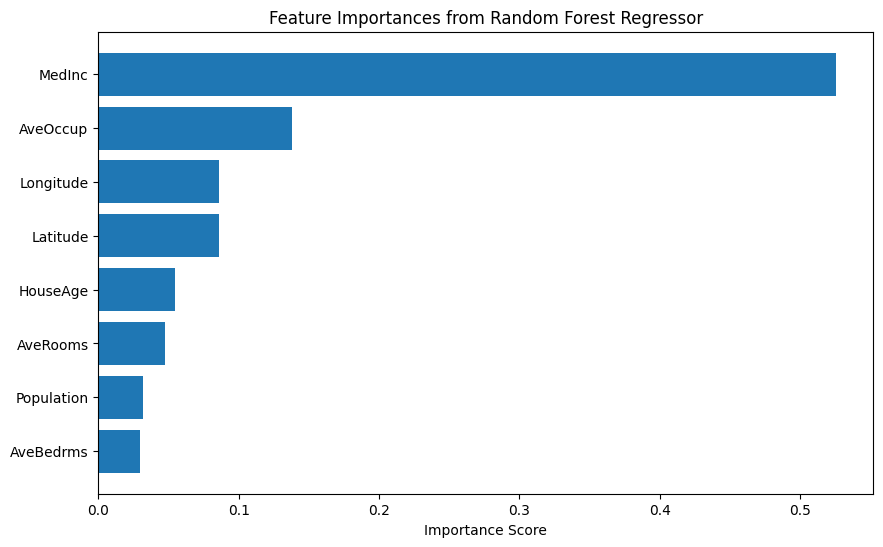

In [25]:
# ques 29  Train a Random Forest Regressor and analyze feature importance scores

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances from Random Forest Regressor')
plt.xlabel('Importance Score')
plt.show()


In [28]:
# ques 30 Train an ensemble model using both Bagging and Random Forest and compare accuracy.

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

bagging_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
acc_bagging = accuracy_score(y_test, y_pred_bagging)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Bagging Classifier Accuracy:      {acc_bagging:.4f}")
print(f"Random Forest Classifier Accuracy: {acc_rf:.4f}")


Bagging Classifier Accuracy:      0.9591
Random Forest Classifier Accuracy: 0.9708


In [29]:
# ques 31 Train a Random Forest Classifier and tune hyperparameters using GridSearchCV


from sklearn.model_selection import train_test_split, GridSearchCV

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:")
print(grid_search.best_params_)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test Set Accuracy: 0.9708


1 Estimators: MSE = 7592.5551
10 Estimators: MSE = 3370.7124
50 Estimators: MSE = 2885.7360
100 Estimators: MSE = 2865.7296
200 Estimators: MSE = 2831.9217


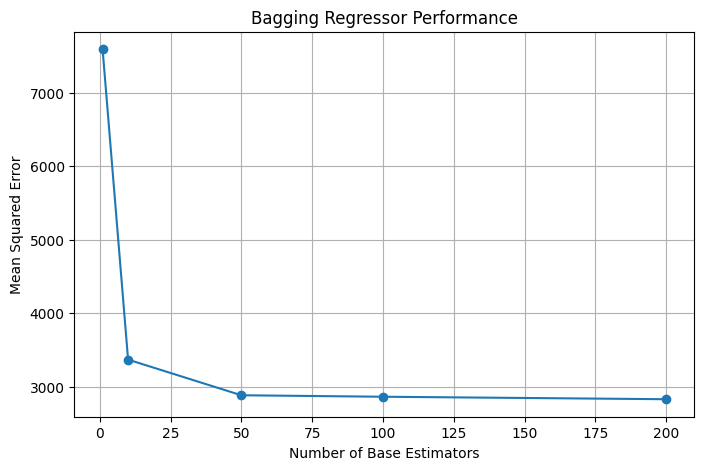

In [31]:
# ques 32 Train a Bagging Regressor with different numbers of base estimators and compare performance


from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
n_estimators_list = [1, 10, 50, 100, 200]
mse_scores = []
for n in n_estimators_list:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"{n} Estimators: MSE = {mse:.4f}")
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, mse_scores, marker='o')
plt.title("Bagging Regressor Performance")
plt.xlabel("Number of Base Estimators")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


In [33]:
# ques 33  Train a Random Forest Classifier and analyze misclassified samples


from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
misclassified_indices = np.where(y_pred != y_test)[0]
print(f"\nNumber of misclassified samples: {len(misclassified_indices)}")
print("\nDetails of misclassified samples:")
df_test = pd.DataFrame(X_test, columns=feature_names)
df_test['True Label'] = y_test
df_test['Predicted Label'] = y_pred
misclassified_df = df_test.iloc[misclassified_indices]
misclassified_df['True Label'] = misclassified_df['True Label'].apply(lambda x: target_names[x])
misclassified_df['Predicted Label'] = misclassified_df['Predicted Label'].apply(lambda x: target_names[x])
print(misclassified_df.head())


Test Accuracy: 0.9708

Number of misclassified samples: 5

Details of misclassified samples:
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
8          13.34         15.86           86.49      520.0          0.10780   
20         13.80         15.79           90.43      584.1          0.10070   
77         13.96         17.05           91.43      602.4          0.10960   
82         14.48         21.46           94.25      648.2          0.09444   
164        15.13         29.81           96.71      719.5          0.08320   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
8             0.15350         0.11690              0.06987         0.1942   
20            0.12800         0.07789              0.05069         0.1662   
77            0.12790         0.09789              0.05246         0.1908   
82            0.09947         0.12040              0.04938         0.2075   
164           0.04605         0.04686              0.

In [36]:
# ques 34 Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier


X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
acc_bagging = accuracy_score(y_test, y_pred_bagging)

print(f"Decision Tree Accuracy:      {acc_dt:.4f}")
print(f"Bagging Classifier Accuracy: {acc_bagging:.4f}")


Decision Tree Accuracy:      1.0000
Bagging Classifier Accuracy: 1.0000


Accuracy: 0.9708


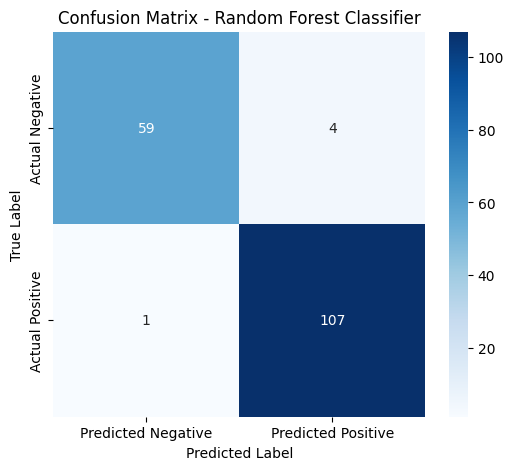

In [37]:
# ques 35  Train a Random Forest Classifier and visualize the confusion matrix

import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


In [38]:
# ques 36 Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)
for name, model in estimators:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)
print(f"Stacking Classifier Accuracy: {acc_stack:.4f}")


dt Accuracy: 1.0000
svm Accuracy: 1.0000
lr Accuracy: 1.0000
Stacking Classifier Accuracy: 1.0000


In [39]:
# ques 37  Train a Random Forest Classifier and print the top 5 most important features

X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
top_features = feat_imp_df.sort_values(by='Importance', ascending=False).head(5)

print("Top 5 most important features:")
print(top_features)


Top 5 most important features:
                 Feature  Importance
7    mean concave points    0.141934
27  worst concave points    0.127136
23            worst area    0.118217
6         mean concavity    0.080557
20          worst radius    0.077975


In [41]:
# ques 38 Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score


from sklearn.metrics import precision_score, recall_score, f1_score
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")


Precision: 0.9633
Recall:    0.9722
F1-score:  0.9677


max_depth=1: Accuracy = 0.9591
max_depth=2: Accuracy = 0.9532
max_depth=4: Accuracy = 0.9708
max_depth=6: Accuracy = 0.9649
max_depth=8: Accuracy = 0.9708
max_depth=10: Accuracy = 0.9708
max_depth=15: Accuracy = 0.9708
max_depth=20: Accuracy = 0.9708
max_depth=None: Accuracy = 0.9708


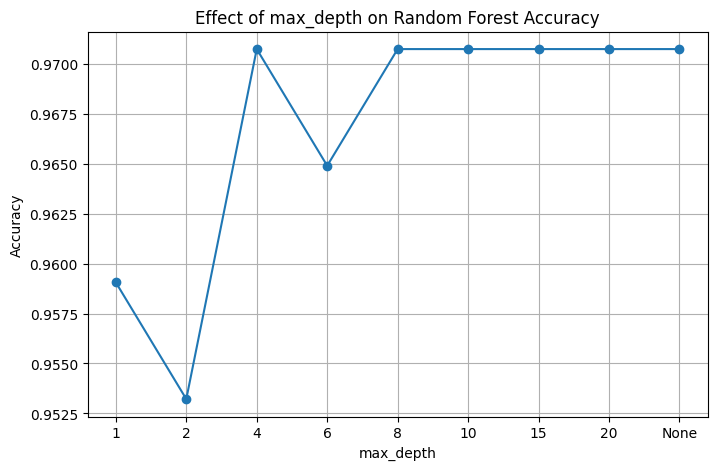

In [43]:
# ques 39  Train a Random Forest Classifier and analyze the effect of max_depth on accuracy


X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

max_depth_values = [1, 2, 4, 6, 8, 10, 15, 20, None]
accuracies = []

for depth in max_depth_values:
    rf = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"max_depth={depth}: Accuracy = {acc:.4f}")
plt.figure(figsize=(8,5))
depth_labels = ['None' if d is None else str(d) for d in max_depth_values]
plt.plot(depth_labels, accuracies, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Random Forest Accuracy')
plt.grid(True)
plt.show()


In [46]:
# ques 40  Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance


from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_regressor = DecisionTreeRegressor()
knn_regressor = KNeighborsRegressor()
bagging_dt = BaggingRegressor(estimator=dt_regressor, n_estimators=50, random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_dt = bagging_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
bagging_knn = BaggingRegressor(estimator=knn_regressor, n_estimators=50, random_state=42)
bagging_knn.fit(X_train, y_train)
y_pred_knn = bagging_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f"MSE with Decision Tree base estimator: {mse_dt:.4f}")
print(f"MSE with KNeighbors base estimator:    {mse_knn:.4f}")


MSE with Decision Tree base estimator: 2885.7360
MSE with KNeighbors base estimator:    4147.9917


ROC-AUC Score: 0.9968


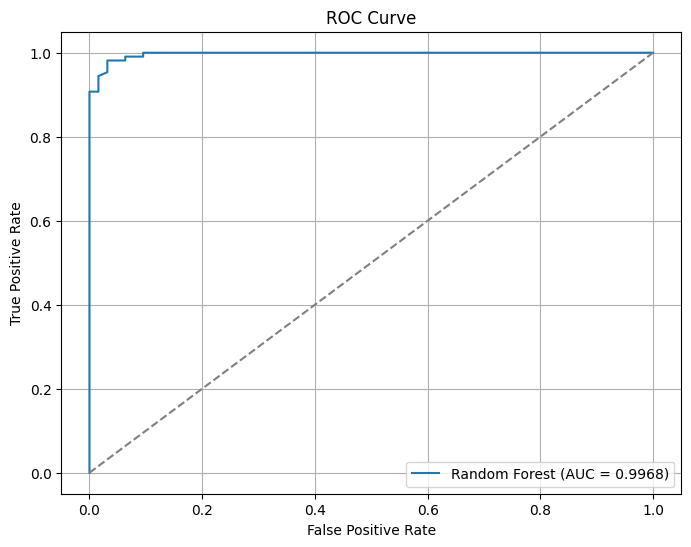

In [48]:
# ques 41  Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score



from sklearn.metrics import roc_auc_score, roc_curve
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_probs = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
# ques 42 Train a Bagging Classifier and evaluate its performance using cross-validation


from sklearn.model_selection import cross_val_score

X, y = load_breast_cancer(return_X_y=True)
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
cv_scores = cross_val_score(bagging_clf, X, y, cv=5)

print(f"Cross-validation accuracies: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")


Cross-validation accuracies: [0.9122807  0.92105263 0.98245614 0.95614035 1.        ]
Mean accuracy: 0.9544
Standard deviation: 0.0339


Average Precision Score: 0.9981


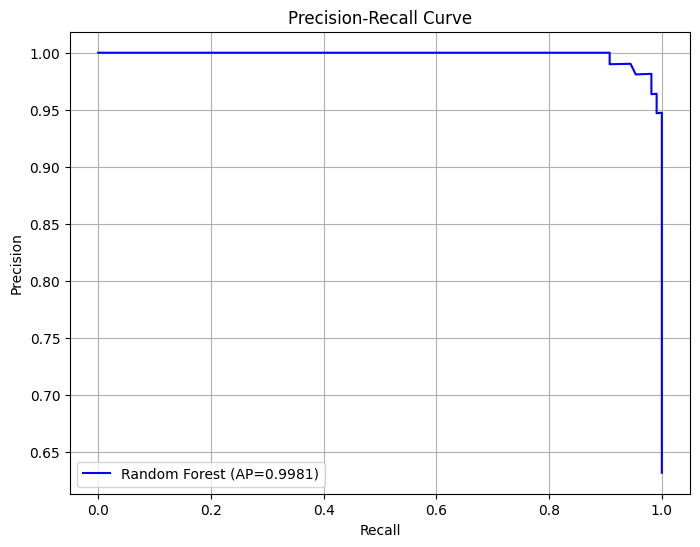

In [51]:
# ques 43 Train a Random Forest Classifier and plot the Precision-Recall curve

from sklearn.metrics import precision_recall_curve, average_precision_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_scores = rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)
print(f"Average Precision Score: {avg_precision:.4f}")
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Random Forest (AP={avg_precision:.4f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [52]:
# ques 44 Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)
for name, model in estimators:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {acc:.4f}")

stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)
print(f"Stacking Classifier accuracy: {acc_stack:.4f}")


rf accuracy: 1.0000
lr accuracy: 1.0000
Stacking Classifier accuracy: 1.0000


max_samples=0.3: MSE = 3403.4737
max_samples=0.5: MSE = 3203.4483
max_samples=0.7: MSE = 3163.6627
max_samples=0.9: MSE = 2937.0004
max_samples=1.0: MSE = 2885.7360


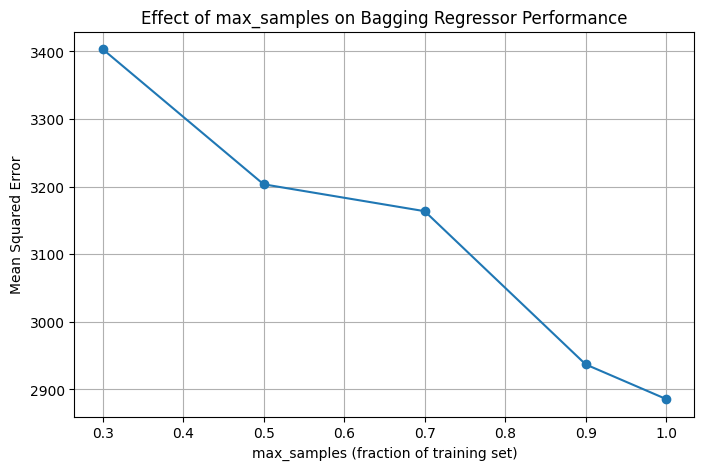

In [54]:
# ques 45 Train a Bagging Regressor with different levels of bootstrap samples and compare performance.



X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
bootstrap_samples = [0.3, 0.5, 0.7, 0.9, 1.0]

mse_scores = []

for sample_size in bootstrap_samples:
    bagging_reg = BaggingRegressor(
      estimator=DecisionTreeRegressor(),
        n_estimators=50,
        max_samples=sample_size,
        random_state=42
    )
    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"max_samples={sample_size}: MSE = {mse:.4f}")
plt.figure(figsize=(8,5))
plt.plot(bootstrap_samples, mse_scores, marker='o')
plt.xlabel('max_samples (fraction of training set)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of max_samples on Bagging Regressor Performance')
plt.grid(True)
plt.show()
